<a href="https://colab.research.google.com/github/uvasabri/HackCville---Node-A/blob/master/Updated_SS_Machine_Learning_Data_Cleanup.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#Import pandas
import pandas as pd
import numpy as np
import seaborn as sns
import pylab as pl
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, accuracy_score, mean_squared_error

In [0]:
#Import weather data
weather = pd.read_csv("https://rattle.togaware.com/weatherAUS.csv").drop(['Location', 'RISK_MM'], axis=1)

In [0]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [4]:
#View a sample results of weather data
weather.sample(15)

,Date,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
122456,2014-08-08,8.9,17.1,0.4,NaN,NaN,WSW,24.0,NaN,SW,0.0,9.0,77.0,59.0,1025.1,1024.6,NaN,NaN,13.6,15.9,No,No
89251,2014-02-04,11.8,22.8,0.0,6.4,12.7,SE,59.0,SE,SE,50.0,39.0,53.0,38.0,1023.3,1022.8,NaN,NaN,16.6,20.7,No,No
56290,2009-04-27,-3.2,0.0,10.6,NaN,NaN,W,50.0,W,W,17.0,13.0,100.0,100.0,NaN,NaN,NaN,NaN,-2.8,-1.3,Yes,Yes
90402,2018-05-04,9.4,16.2,27.4,NaN,NaN,NW,52.0,WNW,W,11.0,17.0,91.0,88.0,1012.7,1016.9,NaN,NaN,11.4,12.4,Yes,Yes
148539,2013-10-20,16.1,40.5,0.0,13.0,12.4,N,39.0,N,NNE,17.0,15.0,3.0,3.0,1012.1,1006.8,0.0,1.0,34.0,38.9,No,No
63366,2010-09-23,4.5,16.6,0.0,2.6,NaN,SW,35.0,SSW,W,19.0,20.0,61.0,54.0,1026.7,1024.3,1.0,1.0,10.9,15.7,No,No
130503,2009-03-14,14.1,31.6,0.0,8.2,10.9,SE,37.0,E,ENE,17.0,13.0,52.0,28.0,1021.5,1016.4,1.0,3.0,16.4,29.7,No,No
96797,2017-06-18,19.0,28.7,0.0,NaN,NaN,ESE,39.0,SE,ESE,17.0,31.0,71.0,57.0,1017.5,1015.2,NaN,NaN,23.5,26.6,No,No
96575,2015-10-06,20.4,29.4,0.2,8.8,9.6,ESE,52.0,ESE,SE,31.0,35.0,53.0,50.0,1019.9,1017.4,5.0,5.0,27.1,27.5,No,Yes
55767,2018-03-17,14.5,30.0,0.8,NaN,NaN,WNW,35.0,NNE,WNW,7.0,19.0,63.0,30.0,1015.9,1013.2,NaN,NaN,18.4,29.5,No,No


In [5]:
#View the shape of the dataset
weather.shape

(157197, 22)

In [6]:
#View columns of datset
weather.columns

Index(['Date', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [0]:
#Convert date string to float
weather['Date'] = pd.to_datetime(arg=weather['Date'])
#Separating the days, months, and years into descrete columns as this data may be valuable in determining rain
weather["Month"] = weather["Date"].dt.month
weather["Year"] = weather["Date"].dt.year
#Delete the 'Date' column as it causes problems later on in scaling
del weather['Date']

In [8]:
#adding a temp diff column
weather['MaxTempDiff'] = weather['MaxTemp'] - weather['MinTemp']
weather['HumDiff'] = weather['Humidity3pm'] - weather['Humidity9am']
weather['WSPDiff'] = weather['WindSpeed3pm'] - weather['WindSpeed9am']
weather['TempDiff'] = weather['Pressure3pm'] - weather['Pressure9am']
weather['CloudDiff'] = weather['Cloud3pm'] - weather['Cloud9am']
weather['TempDiff'] = weather['Temp3pm'] - weather['Temp9am']


weather.sample()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Month,Year,MaxTempDiff,HumDiff,WSPDiff,TempDiff,CloudDiff
106380,12.9,25.3,0.0,NaN,NaN,W,22.0,NaN,W,0.0,15.0,70.0,33.0,1023.1,1021.7,NaN,NaN,15.9,24.4,No,No,3,2015,12.4,-37.0,15.0,8.5,NaN


In [9]:
#Check for null values
print('Let\'s check for null values\n')
print(weather.isnull().sum())

Let's check for null values

MinTemp           1798
MaxTemp           1591
Rainfall          3604
Evaporation      72676
Sunshine         79457
WindGustDir      11641
WindGustSpeed    11577
WindDir9am       11772
WindDir3pm        5356
WindSpeed9am      2391
WindSpeed3pm      4174
Humidity9am       2871
Humidity3pm       5247
Pressure9am      16846
Pressure3pm      16844
Cloud9am         62970
Cloud3pm         67076
Temp9am           1968
Temp3pm           4329
RainToday         3604
RainTomorrow      3605
Month                0
Year                 0
MaxTempDiff       2390
HumDiff           6028
WSPDiff           4738
TempDiff          4983
CloudDiff        71999
dtype: int64


In [0]:
weather.dropna(inplace=True)

In [11]:
#Check for null values
print('Let\'s check for null values\n')
print(weather.isnull().sum())

Let's check for null values

MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
Month            0
Year             0
MaxTempDiff      0
HumDiff          0
WSPDiff          0
TempDiff         0
CloudDiff        0
dtype: int64


In [12]:
weather.shape

(58037, 28)

In [13]:
#drop outliers using z-scores greater than 3
from scipy import stats
z = np.abs(stats.zscore(weather._get_numeric_data()))
print(z)
weather = weather[(z < 3).all(axis=1)]
weather.shape

[[0.7025383  1.58448416 0.30233505 ... 1.16731987 0.66605107 1.21437592]
 [0.78065105 0.6785423  0.30233505 ... 0.49933228 0.63680518 0.03124956]
 [0.93687656 1.92960487 0.30233505 ... 2.28503101 0.49057574 2.04479291]
 ...
 [1.67113641 1.09556315 4.82719372 ... 0.9292267  0.76699743 0.03124956]
 [2.29603842 0.99490295 0.27351747 ... 1.28636645 2.40476713 0.38395893]
 [1.74924916 1.19622336 2.57942269 ... 1.16731987 0.32830911 0.38395893]]


(53949, 28)

In [0]:
#converting rain data into binary information
weather['RainToday'].replace({'No': 0, 'Yes': 1},inplace = True)
weather['RainTomorrow'].replace({'No': 0, 'Yes': 1},inplace = True)

In [15]:
weather.dtypes

MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday          int64
RainTomorrow       int64
Month              int64
Year               int64
MaxTempDiff      float64
HumDiff          float64
WSPDiff          float64
TempDiff         float64
CloudDiff        float64
dtype: object

In [0]:
# #See unique values and convert them to int using pd.getDummies()
# categorical_columns = ['WindGustDir', 'WindDir3pm', 'WindDir9am', 'Month', 'Year']
# weather = pd.get_dummies(weather, columns=categorical_columns)

# After running the corr matrix (below) with this code in, I decided it was mostly not useful and made it difficult to identify the meaningful features

In [0]:
#Convert objects to strings
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()
weather['WindGustDir'] = enc.fit_transform(weather['WindGustDir'].astype(str))
weather['WindDir9am'] = enc.fit_transform(weather['WindDir9am'].astype(str))
weather['WindDir3pm'] = enc.fit_transform(weather['WindDir3pm'].astype(str))
weather['RainToday'] = enc.fit_transform(weather['RainToday'].astype(str))
weather['RainTomorrow'] = enc.fit_transform(weather['RainTomorrow'].astype(str))

In [18]:
#Encode categorical data - Convert categorical column in the dataset to numerical data.
weather['WindGustDir'] = enc.fit_transform(weather['WindGustDir'])
weather['WindDir9am'] = enc.fit_transform(weather['WindDir9am'])
weather['WindDir3pm'] = enc.fit_transform(weather['WindDir3pm'])
weather['RainToday'] = enc.fit_transform(weather['RainToday'])
weather['RainTomorrow'] = enc.fit_transform(weather['RainTomorrow'])

enc.classes_ #Maintains the information of the encoded values. Encode a non-numerical data into a numerical data

weather.head(15)
#Notice how all of the non-numerical columns are now numerical

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Month,Year,MaxTempDiff,HumDiff,WSPDiff,TempDiff,CloudDiff
6514,17.9,35.2,0.0,12.0,12.3,11,48.0,1,12,6.0,20.0,20.0,13.0,1006.3,1004.4,2.0,5.0,26.6,33.4,0,0,1,2009,17.3,-7.0,14.0,6.8,3.0
6515,18.4,28.9,0.0,14.8,13.0,8,37.0,10,10,19.0,19.0,30.0,8.0,1012.9,1012.1,1.0,1.0,20.3,27.0,0,0,1,2009,10.5,-22.0,0.0,6.7,0.0
6517,19.4,37.6,0.0,10.8,10.6,5,46.0,5,6,30.0,15.0,42.0,22.0,1012.3,1009.2,1.0,6.0,28.7,34.9,0,0,1,2009,18.2,-20.0,-15.0,6.2,5.0
6518,21.9,38.4,0.0,11.4,12.2,14,31.0,14,15,6.0,6.0,37.0,22.0,1012.7,1009.1,1.0,5.0,29.1,35.6,0,0,1,2009,16.5,-15.0,0.0,6.5,4.0
6519,24.2,41.0,0.0,11.2,8.4,14,35.0,7,14,17.0,13.0,19.0,15.0,1010.7,1007.4,1.0,6.0,33.6,37.6,0,0,1,2009,16.8,-4.0,-4.0,4.0,5.0
6520,27.1,36.1,0.0,13.0,0.0,3,43.0,3,14,7.0,20.0,26.0,19.0,1007.7,1007.4,8.0,8.0,30.7,34.3,0,0,1,2009,9.0,-7.0,13.0,3.6,0.0
6521,23.3,34.0,0.0,9.8,12.6,11,41.0,8,10,17.0,19.0,33.0,15.0,1011.3,1009.9,3.0,1.0,25.0,31.5,0,0,1,2009,10.7,-18.0,2.0,6.5,-2.0
6522,16.1,34.2,0.0,14.6,13.2,9,37.0,9,8,15.0,6.0,25.0,9.0,1013.3,1009.2,1.0,1.0,20.7,32.8,0,0,1,2009,18.1,-16.0,-9.0,12.1,0.0
6523,19.0,35.5,0.0,12.0,12.3,1,48.0,1,15,30.0,9.0,46.0,28.0,1008.3,1004.0,1.0,5.0,23.4,33.3,0,0,1,2009,16.5,-18.0,-21.0,9.9,4.0
6524,19.7,35.5,0.0,11.0,12.7,4,41.0,5,15,15.0,17.0,61.0,14.0,1007.9,1005.8,1.0,5.0,24.0,33.6,0,0,1,2009,15.8,-47.0,2.0,9.6,4.0


In [19]:
weather.shape

(53949, 28)

In [20]:
#Scale data (0 to 1) to normalize the relationships
from sklearn import preprocessing
scaler = preprocessing.MinMaxScaler()
scaler.fit(weather)
weather_scaled = pd.DataFrame(scaler.transform(weather), index=weather.index, columns=weather.columns)
#View scaled data
weather_scaled.sample(105)

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Month,Year,MaxTempDiff,HumDiff,WSPDiff,TempDiff,CloudDiff
11393,0.577657,0.471883,0.000000,0.240964,0.648276,0.733333,0.416667,0.533333,0.666667,0.540541,0.476190,0.438202,0.57,0.500000,0.508516,0.125,0.333333,0.557292,0.447837,0.0,1.0,0.727273,0.500000,0.301205,0.758242,0.42,0.308824,0.642857
112027,0.367847,0.271394,0.000000,0.072289,0.537931,0.866667,0.750000,0.866667,1.000000,0.648649,0.785714,0.853933,0.68,0.356796,0.381995,0.750,0.666667,0.286458,0.251908,0.0,0.0,0.636364,0.416667,0.281124,0.472527,0.60,0.441176,0.500000
78413,0.574932,0.740831,0.000000,0.481928,0.724138,0.866667,0.291667,0.866667,0.933333,0.189189,0.309524,0.460674,0.17,0.473301,0.486618,0.000,0.555556,0.526042,0.745547,0.0,0.0,0.181818,0.833333,0.746988,0.296703,0.54,0.941176,0.857143
34167,0.400545,0.396088,0.000000,0.156627,0.682759,0.866667,0.472222,0.866667,0.066667,0.594595,0.214286,0.573034,0.36,0.750000,0.756691,0.000,0.000000,0.312500,0.371501,0.0,0.0,0.545455,0.416667,0.437751,0.395604,0.16,0.622549,0.500000
140501,0.158038,0.163814,0.000000,0.060241,0.565517,0.466667,0.361111,0.466667,0.400000,0.594595,0.428571,0.808989,0.54,0.774272,0.800487,0.125,0.444444,0.078125,0.175573,0.0,0.0,0.545455,0.166667,0.413655,0.362637,0.34,0.686275,0.714286
91859,0.465940,0.440098,0.000000,0.337349,0.634483,0.600000,0.291667,0.733333,0.133333,0.108108,0.214286,0.528090,0.40,0.791262,0.771290,0.375,0.666667,0.494792,0.450382,0.0,0.0,0.727273,0.333333,0.413655,0.483516,0.52,0.431373,0.714286
69513,0.362398,0.300733,0.061135,0.325301,0.193103,1.000000,0.875000,0.866667,1.000000,0.594595,0.833333,0.662921,0.74,0.094660,0.204380,0.750,0.777778,0.294271,0.223919,1.0,1.0,0.818182,0.166667,0.337349,0.725275,0.68,0.372549,0.571429
23643,0.623978,0.449878,0.096070,0.156627,0.551724,0.200000,0.333333,0.200000,0.466667,0.243243,0.357143,0.775281,0.73,0.390777,0.423358,0.125,0.333333,0.549479,0.440204,1.0,0.0,0.454545,0.333333,0.196787,0.604396,0.54,0.308824,0.642857
36702,0.337875,0.242054,0.000000,0.120482,0.000000,0.466667,0.263889,0.466667,0.466667,0.351351,0.357143,0.606742,0.51,0.733010,0.710462,1.000,0.888889,0.276042,0.259542,0.0,0.0,0.545455,0.250000,0.277108,0.527473,0.46,0.475490,0.500000
111233,0.408719,0.295844,0.000000,0.108434,0.000000,0.200000,0.486111,0.333333,0.333333,0.297297,0.261905,0.606742,0.87,0.330097,0.289538,0.875,0.888889,0.364583,0.216285,0.0,1.0,0.363636,0.250000,0.261044,0.923077,0.42,0.225490,0.571429


*Now we've finished cleaning up the data and can get started on*

---
**Feature Selection**

In [0]:
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, accuracy_score, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier


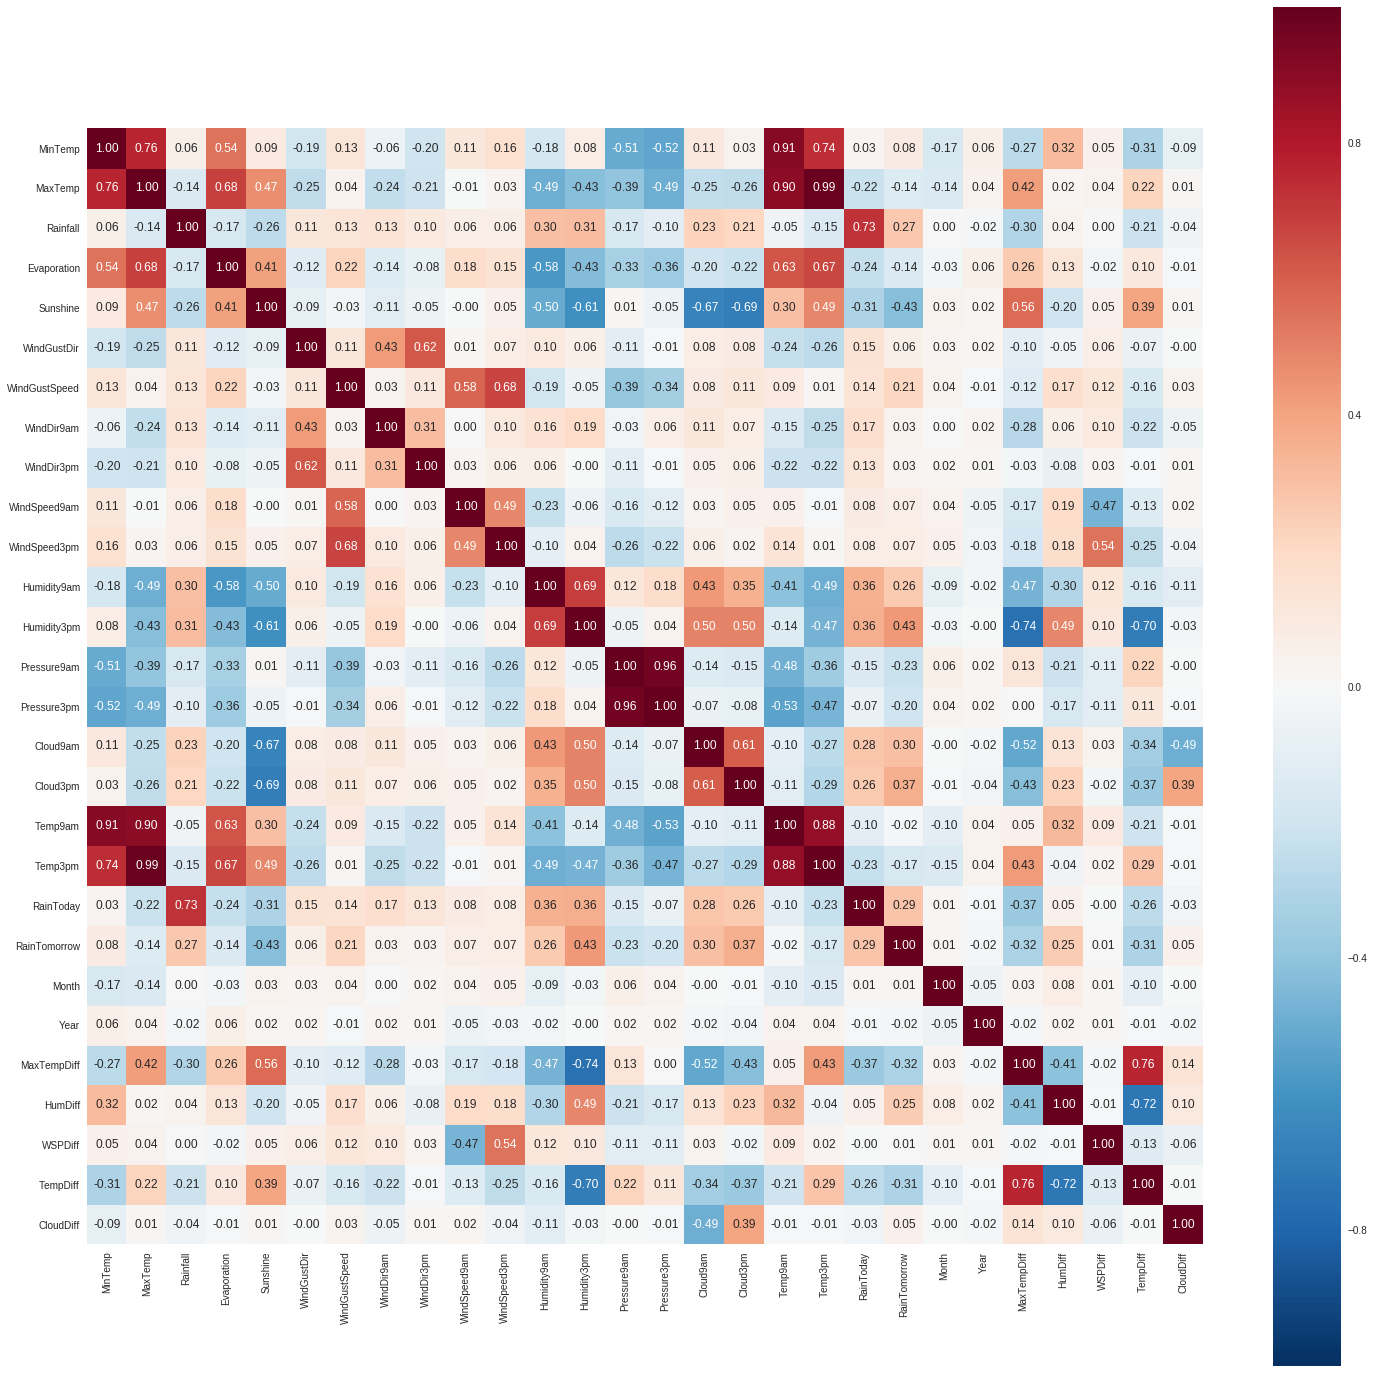

In [22]:
pl.figure(figsize =(25,25))
corrmat = weather_scaled.corr()
sns.heatmap(corrmat, annot=True, fmt='.2f', square=True);
plt.show()

In [23]:
#dropping uncorrelated columns
FilteredDF = weather_scaled.drop(columns=['CloudDiff','WSPDiff', 'Year', 'Month', 'Temp9am', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'WindGustDir', 'MinTemp', 'MaxTemp'])
FilteredDF.sample(15)

,Rainfall,Evaporation,Sunshine,WindGustSpeed,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp3pm,RainToday,RainTomorrow,MaxTempDiff,HumDiff,TempDiff
11225,0.000000,0.289157,0.206897,0.361111,0.685393,0.93,0.381068,0.389294,0.750,0.888889,0.450382,0.0,1.0,0.285141,0.912088,0.220588
23403,0.000000,0.265060,0.606897,0.486111,0.674157,0.65,0.713592,0.671533,0.750,0.111111,0.447837,0.0,0.0,0.204819,0.615385,0.401961
152155,0.375546,0.373494,0.758621,0.388889,0.685393,0.46,0.339806,0.318735,0.375,0.666667,0.722646,1.0,0.0,0.385542,0.395604,0.539216
114419,0.000000,0.614458,0.724138,0.180556,0.033708,0.08,0.509709,0.508516,0.375,0.444444,0.770992,0.0,0.0,0.751004,0.615385,0.808824
92156,0.000000,0.120482,0.000000,0.111111,0.730337,0.90,0.691748,0.710462,1.000,0.888889,0.264631,0.0,1.0,0.112450,0.835165,0.196078
66845,0.034934,0.036145,0.420690,0.694444,0.797753,0.59,0.310680,0.394161,0.750,0.222222,0.282443,0.0,0.0,0.317269,0.428571,0.416667
44595,0.008734,0.024096,0.489655,0.180556,0.876404,0.63,0.701456,0.666667,0.500,0.666667,0.312977,0.0,0.0,0.477912,0.395604,0.549020
78259,0.000000,0.072289,0.427586,0.263889,0.617978,0.50,0.740291,0.725061,0.000,0.666667,0.297710,0.0,0.0,0.369478,0.505495,0.495098
75654,0.000000,0.072289,0.655172,0.236111,0.842697,0.43,0.621359,0.566910,0.125,0.111111,0.282443,0.0,0.0,0.445783,0.208791,0.710784
101651,0.000000,0.289157,0.503448,0.361111,0.741573,0.65,0.548544,0.566910,0.375,0.777778,0.519084,0.0,0.0,0.337349,0.549451,0.397059


In [24]:
FilteredDF.columns

Index(['Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'Humidity9am',
       'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm',
       'Temp3pm', 'RainToday', 'RainTomorrow', 'MaxTempDiff', 'HumDiff',
       'TempDiff'],
      dtype='object')

In [0]:
#Create a feature df from the columns and a target var
X = FilteredDF.loc[:,FilteredDF.columns!='RainTomorrow']
y = FilteredDF[['RainTomorrow']]

In [0]:
#Split test and training data for target object 1
#By default 75% training data and 25% testing data but we will do 80% training data and 20% testing data

x_train, x_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=.2,
                                                    random_state=1)

In [27]:
print (x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(43159, 15) (10790, 15) (43159, 1) (10790, 1)


**Logistic Regression **

In [28]:
clf_logreg = LogisticRegression(random_state=0)
clf_logreg.fit(x_train,y_train)
log_y_pred = clf_logreg.predict(x_test)
score = accuracy_score(y_test,log_y_pred)
print('Accuracy :',score)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy : 0.8546802594995366


**Linear Regression**

In [0]:
# clf_lin = LinearRegression()
# clf_lin.fit(x_train, y_train)
# lin_y_pred = clf_lin.predict(x_test)
# score = clf_lin.score(y_test, lin_y_pred)
# print('Accuracy :',score)


**Random Forest Classifier** 

In [33]:
clf_rf = RandomForestClassifier(n_estimators=100, max_depth=4,random_state=0)
clf_rf.fit(x_train,y_train)
rf_y_pred = clf_rf.predict(x_test)
score = accuracy_score(y_test,rf_y_pred)
print('Accuracy :',score)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


Accuracy : 0.8498609823911029


**Decision Tree Classifier**

In [31]:
clf_dt = DecisionTreeClassifier(random_state=0)
clf_dt.fit(x_train,y_train)
dt_y_pred = clf_dt.predict(x_test)
score = accuracy_score(y_test, dt_y_pred)
print('Accuracy :',score)

Accuracy : 0.7934198331788693


In [0]:
from sklearn.linear_model import Lasso

best_alpha = 0.00099

regr = Lasso(alpha=best_alpha, max_iter=50000)
regr.fit(x_train, label_df)

# run prediction on the training set to get a rough idea of how well it does
y_pred = regr.predict(train_new[inter_cols])
y_test = label_df
print("Lasso score on training set: ", rmse(y_test, y_pred))